# Exploratory Data Analysis and Data Visualization

Exploratory Data Analysis and Data Visualization are done for the following reasons:

- Identify additional problems in the data that require cleaning or awareness (e.g., bias, inconsistent entries, coding issues)
- Determine needed data transformations
- Indicate directions for analysis

In [1]:
# Packages for loading, cleaning, visualization, and analysis

# Data
import pandas as pd
import numpy as np
import scipy as sp
import os
import string as st

# Graphing and visualizing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from pylab import savefig


# Printing
import locale

# Show plots locally
locale.setlocale( locale.LC_ALL, '' )

%matplotlib inline

### In Class Exercise 1

Load the clean train accidents data and look at the summaries of quantitative and qualitative variables. List a few transformations or data operations suggested by these summaries. Also what variables are response variables and what variables are predictors?

#### Answer

The summaries suggest that many of the variables are extremely skewed. 
1. We can do log transformations on variables EVACUATE and EQPDMG to reduce their skewness. 
2. YEAR and YEAR 4 are giving the same information, so we only have to keep one. 
3. DUMMY3 are all 0s and JOINTCDs are all 1s, not very useful information, so we don't have to keep them. 
4. CARNBR1 is a weird variable that seems to contain random numbers.INCDTNO needs to be cleaned up as it contains too many different levels as a categorical variable. 
5. TOTKLD and TOTINJ are the sums of KLD and INJ correspondingly.
6. create a CASUALTY variable by summing TOTKLD and TOTINJ.

The response variables are ACCDMG,EQPDMG,TRKDMG,CARSDMG,TOTKLD,and TOTINJ.
The predictors are TRNSPD,TONS,TEMP and MONTH.

In [4]:
path = "/Users/kia/Desktop/DS 6001/data/"
file = "TrainAccidents_Clean.csv"
accidents_df = pd.read_csv(path+file,low_memory=False)
accidents_df.shape

(38167, 87)

In [5]:
accidents_df.columns

Index(['ACCAUSE', 'ACCDMG', 'ACCTRK', 'ACCTRKCL', 'AMPM', 'CABOOSE1',
       'CABOOSE2', 'CARNBR1', 'CARS', 'CARSDMG', 'CARSHZD', 'CASINJ',
       'CASINJRR', 'CASKLD', 'CASKLDRR', 'CAUSE', 'CNTYCD', 'CONDUCTR',
       'COUNTY', 'DAY', 'DUMMY3', 'EMPTYF1', 'EMPTYF2', 'EMPTYP1', 'EMPTYP2',
       'ENGRS', 'EQATT', 'EQPDMG', 'EVACUATE', 'HEADEND1', 'HEADEND2',
       'HIGHSPD', 'IMO', 'IMO3', 'INCDTNO', 'INCDTNO3', 'IYR', 'IYR3',
       'JOINTCD', 'LOADF1', 'LOADF2', 'LOADP1', 'LOADP2', 'MIDMAN1', 'MIDMAN2',
       'MIDREM1', 'MIDREM2', 'MONTH', 'NARRLEN', 'OTHERINJ', 'OTHERKLD',
       'PASSINJ', 'PASSKLD', 'POSITON1', 'POSITON2', 'RAILROAD', 'REGION',
       'RMAN1', 'RMAN2', 'RR3', 'RRCAR1', 'RREM1', 'RREM2', 'RREMPINJ',
       'RREMPKLD', 'STATE', 'STATION', 'STCNTY', 'TEMP', 'TIMEHR', 'TIMEMIN',
       'TONS', 'TOTINJ', 'TOTKLD', 'TRKCLAS', 'TRKDMG', 'TRKNAME', 'TRNSPD',
       'TYPE', 'TYPEQ', 'TYPRR', 'TYPSPD', 'TYPTRK', 'VISIBLTY', 'WEATHER',
       'YEAR', 'YEAR4'],
      dtype=

In [6]:
accidents_df[['ACCAUSE', 'ACCDMG', 'ACCTRK', 'ACCTRKCL', 'AMPM', 'CABOOSE1',
       'CABOOSE2', 'CARNBR1', 'CARS', 'CARSDMG', 'CARSHZD', 'CASINJ',
       'CASINJRR', 'CASKLD', 'CASKLDRR', 'CAUSE', 'CNTYCD', 'CONDUCTR',
       'COUNTY', 'DAY', 'DUMMY3', 'EMPTYF1', 'EMPTYF2', 'EMPTYP1', 'EMPTYP2']].describe()
#DUMMY3: all 0. we don't need it

,ACCDMG,ACCTRK,CABOOSE1,CABOOSE2,CARS,CARSDMG,CARSHZD,CASINJ,CASINJRR,CASKLD,CASKLDRR,CNTYCD,CONDUCTR,DAY,DUMMY3,EMPTYF1,EMPTYF2,EMPTYP1,EMPTYP2
count,3.816700e+04,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.0,38167.000000,38167.000000,38167.000000,38167.00000
mean,1.213072e+05,1.924568,0.006288,0.001231,2.615479,0.301491,0.019493,0.132628,0.110121,0.004638,0.003773,96.006288,0.847276,15.570991,0.0,15.634606,1.103519,0.145518,0.01648
std,5.559859e+05,0.867799,0.082297,0.035071,8.711266,1.295449,0.352542,3.324266,3.081319,0.171625,0.112082,102.057473,0.432366,8.743546,0.0,26.297847,2.962154,1.130320,0.18992
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.00000
25%,1.447300e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,1.000000,8.000000,0.0,0.000000,0.000000,0.000000,0.00000
50%,2.720000e+04,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,1.000000,15.000000,0.0,2.000000,0.000000,0.000000,0.00000
75%,7.055200e+04,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,123.000000,1.000000,23.000000,0.0,21.000000,1.000000,0.000000,0.00000
max,6.693422e+07,4.000000,5.000000,1.000000,133.000000,34.000000,32.000000,292.000000,292.000000,25.000000,11.000000,840.000000,5.000000,31.000000,0.0,338.000000,96.000000,65.000000,9.00000


In [7]:
accidents_df[['ENGRS', 'EQATT', 'EQPDMG', 'EVACUATE', 'HEADEND1', 'HEADEND2',
       'HIGHSPD', 'IMO', 'IMO3', 'INCDTNO', 'INCDTNO3', 'IYR', 'IYR3',
       'JOINTCD', 'LOADF1', 'LOADF2', 'LOADP1', 'LOADP2', 'MIDMAN1', 'MIDMAN2']].describe()
#EVACUATE, EQPDMG is extremely skewed, since max is so much bigger than mean
#EQPDMG quite a lot of zero there. are those we want to care about?
#JOINTCD: all 1. we don't need it.

,ENGRS,EQPDMG,EVACUATE,HEADEND1,HEADEND2,HIGHSPD,IMO,IMO3,IYR,IYR3,JOINTCD,LOADF1,LOADF2,LOADP1,LOADP2,MIDMAN1,MIDMAN2
count,38167.000000,3.816700e+04,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.0,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000
mean,0.947625,6.997971e+04,2.809862,1.923049,0.151911,11.624571,6.436634,6.436634,7.472502,7.472502,1.0,29.564493,2.391935,0.205885,0.008803,0.014410,0.001048
std,0.445779,3.684381e+05,261.239305,1.331508,0.513079,14.826617,3.437902,3.437902,4.496084,4.496084,0.0,35.244974,4.602066,1.348977,0.220346,0.212169,0.039636
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.707500e+03,0.000000,1.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.400000e+04,0.000000,2.000000,0.000000,6.000000,6.000000,6.000000,7.000000,7.000000,1.0,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.530200e+04,0.000000,3.000000,0.000000,10.000000,9.000000,9.000000,11.000000,11.000000,1.0,47.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,4.393082e+07,50000.000000,9.000000,7.000000,150.000000,12.000000,12.000000,16.000000,16.000000,1.0,374.000000,113.000000,49.000000,21.000000,9.000000,3.000000


In [9]:
accidents_df[['MONTH','NARRLEN','OTHERINJ','OTHERKLD','PASSINJ','PASSKLD']].describe()

,MONTH,NARRLEN,OTHERINJ,OTHERKLD,PASSINJ,PASSKLD
count,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000
mean,6.436634,225.199492,0.049572,0.001467,0.042497,0.000629
std,3.437902,178.762684,5.527734,0.059676,1.918348,0.053192
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,122.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,178.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,266.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,1500.000000,999.000000,8.000000,218.000000,8.000000


In [10]:
accidents_df[['POSITON1', 'POSITON2', 'RAILROAD', 'REGION',
       'RMAN1', 'RMAN2', 'RR3', 'RRCAR1', 'RREM1', 'RREM2', 'RREMPINJ',
       'RREMPKLD', 'STATE', 'STATION', 'STCNTY', 'TEMP', 'TIMEHR', 'TIMEMIN']].describe()

,POSITON1,POSITON2,REGION,RMAN1,RMAN2,RREM1,RREM2,RREMPINJ,RREMPKLD,STATE,TEMP,TIMEHR,TIMEMIN
count,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000
mean,20.598711,3.804700,4.467105,0.043257,0.003878,0.064296,0.005476,0.028087,0.001100,29.090523,57.860403,6.394267,25.192680
std,27.782441,15.285633,1.994677,0.284335,0.080190,0.311116,0.086240,0.297762,0.040935,15.515207,22.129222,3.469479,17.507626
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-42.000000,1.000000,0.000000
25%,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,40.000000,3.000000,10.000000
50%,8.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,60.000000,6.000000,30.000000
75%,30.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,75.000000,9.000000,40.000000
max,245.000000,159.000000,8.000000,18.000000,4.000000,7.000000,2.000000,25.000000,2.000000,56.000000,118.000000,12.000000,59.000000


In [13]:
accidents_df[['TONS', 'TOTINJ', 'TOTKLD', 'TRKCLAS', 'TRKDMG', 'TRKNAME', 'TRNSPD',
       'TYPE', 'TYPEQ', 'TYPRR', 'TYPSPD', 'TYPTRK', 'VISIBLTY', 'WEATHER',
       'YEAR', 'YEAR4']].describe()
#year and year4 are giving same info
#total damage is the sum of DMG
#TOTINJ & TOTKLD --> TOTINJ+TOTKLD=casualty  because they are response variables

,TONS,TOTINJ,TOTKLD,TRKDMG,TRNSPD,TYPTRK,VISIBLTY,WEATHER,YEAR,YEAR4
count,38167.000000,38167.000000,38167.000000,3.816700e+04,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000,38167.000000
mean,3368.806272,0.120156,0.003196,3.543068e+04,10.584615,1.927477,2.857285,1.527105,7.472502,2007.472502
std,4786.069841,5.919000,0.093213,1.487279e+05,14.588977,0.866581,1.034054,0.966229,4.496084,4.496084
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,2001.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,4.000000,1.000000,2.000000,1.000000,4.000000,2004.000000
50%,1110.000000,0.000000,0.000000,3.000000e+03,6.000000,2.000000,2.000000,1.000000,7.000000,2007.000000
75%,5244.000000,0.000000,0.000000,1.964650e+04,10.000000,2.000000,4.000000,2.000000,11.000000,2011.000000
max,99000.000000,1000.000000,9.000000,9.930000e+06,150.000000,4.000000,4.000000,6.000000,16.000000,2016.000000


In [12]:
#Categorical variables
#frequency count
cat_list = accidents_df.columns[accidents_df.dtypes == 'object']
for name in cat_list:
    print('Variable name: '+ name)
    print(accidents_df[name].value_counts())
    print()
    
#CARNBR1: weird var
#COUNTY: big yard at COOK; 
#INCDTNO: need to clean up. infinite number
#RAILROAD: lot of them there. UP - Union Specific, monoply player

Variable name: ACCAUSE
T110    2350
H702    2068
H306    1478
T314    1025
H307     994
T220     946
M405     723
T207     699
H704     612
H503     548
H607     526
T221     525
H302     517
M404     478
H018     457
M411     457
T111     429
T109     424
H303     422
T210     411
H318     409
H020     403
E53C     403
T202     393
M599     393
H312     390
T102     372
T311     362
M101     359
T001     350
        ... 
E12C       2
H99C       2
E62L       2
E13C       2
H899       2
E30L       2
E4TL       1
E25L       1
E33L       1
E03L       1
S101       1
E19C       1
S001       1
E04L       1
E31L       1
E01C       1
E63L       1
H517       1
S008       1
E24L       1
E36L       1
E52L       1
H304       1
H515       1
E61L       1
M303       1
E40L       1
E34L       1
E35L       1
H99D       1
Name: ACCAUSE, Length: 359, dtype: int64

Variable name: ACCTRKCL
1    24957
4     3844
2     3675
3     2609
X     1742
5      961
6      177
7      136
8       55
9       11
Name: AC

### In-Class Exercise 2

Use histograms, boxplots, scatter plot matrices (sns.pairplot) and heatmaps to look at characteristics and relationships of the response variables. 

#### Answer 

ACCDMG,EQPDMG and TRKDMG highly skewed.
TOTKLD and TOTINJ are correlated.
Look at the code & plots below.

In [22]:
Response = ['ACCDMG','EQPDMG','TRKDMG','CARSDMG','TOTKLD','TOTINJ']
Predictors = ['TRNSPD','TONS','TEMP','MONTH']

In [23]:
#summary of response variables
accidents_df[Response].describe()

,ACCDMG,EQPDMG,TRKDMG,CARSDMG,TOTKLD,TOTINJ
count,3.816700e+04,3.816700e+04,3.816700e+04,38167.000000,38167.000000,38167.000000
mean,1.213072e+05,6.997971e+04,3.543068e+04,0.301491,0.003196,0.120156
std,5.559859e+05,3.684381e+05,1.487279e+05,1.295449,0.093213,5.919000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.447300e+04,5.707500e+03,0.000000e+00,0.000000,0.000000,0.000000
50%,2.720000e+04,1.400000e+04,3.000000e+03,0.000000,0.000000,0.000000
75%,7.055200e+04,3.530200e+04,1.964650e+04,0.000000,0.000000,0.000000
max,6.693422e+07,4.393082e+07,9.930000e+06,34.000000,9.000000,1000.000000


In [24]:
#summary of predictors variables
accidents_df[Predictors].describe()

,TRNSPD,TONS,TEMP,MONTH
count,38167.000000,38167.000000,38167.000000,38167.000000
mean,10.584615,3368.806272,57.860403,6.436634
std,14.588977,4786.069841,22.129222,3.437902
min,0.000000,0.000000,-42.000000,1.000000
25%,4.000000,0.000000,40.000000,3.000000
50%,6.000000,1110.000000,60.000000,6.000000
75%,10.000000,5244.000000,75.000000,9.000000
max,150.000000,99000.000000,118.000000,12.000000


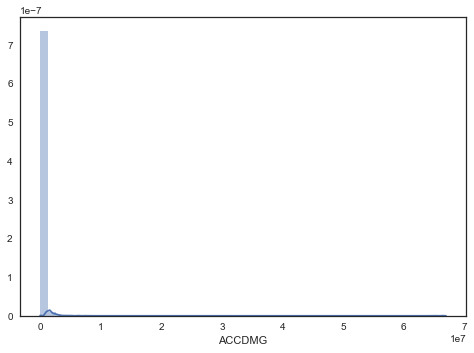

In [25]:
sns.distplot(accidents_df.ACCDMG)
#univariate distribution of observations

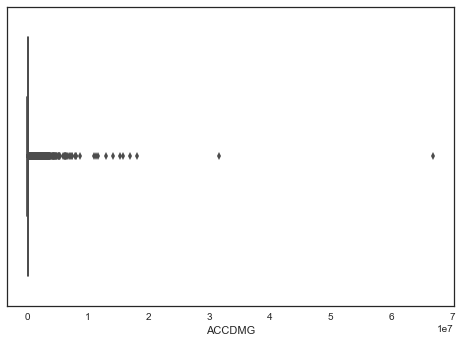

In [26]:
#Box plot ACCDMG
sns.boxplot(accidents_df.ACCDMG)
#Look at the outliers.
#ACCDMG seems very skewed.

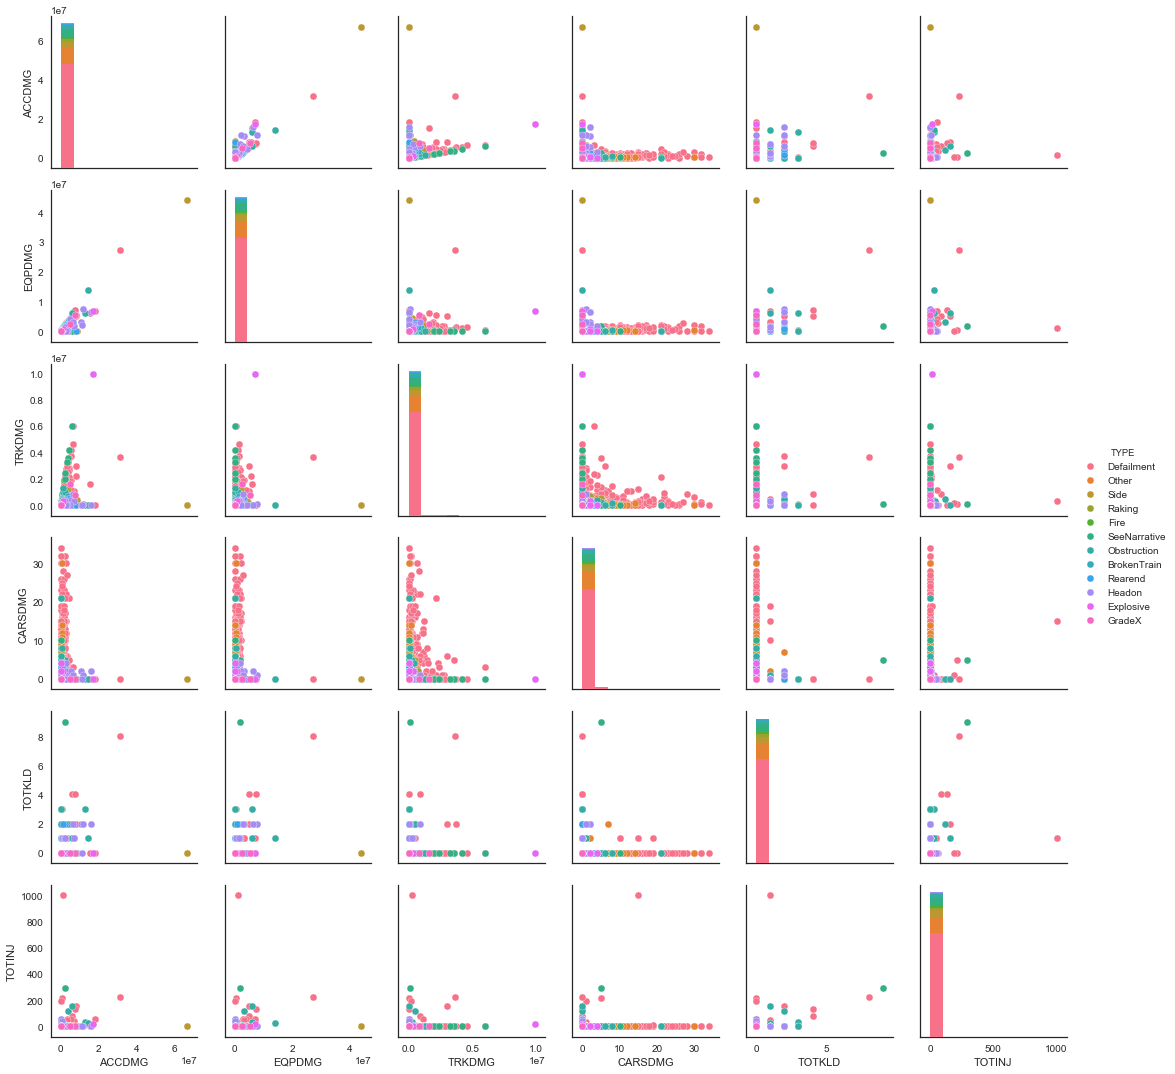

In [27]:
#Scatterplot matrix of the matrix
sns.pairplot(accidents_df,vars=Response,hue='TYPE')

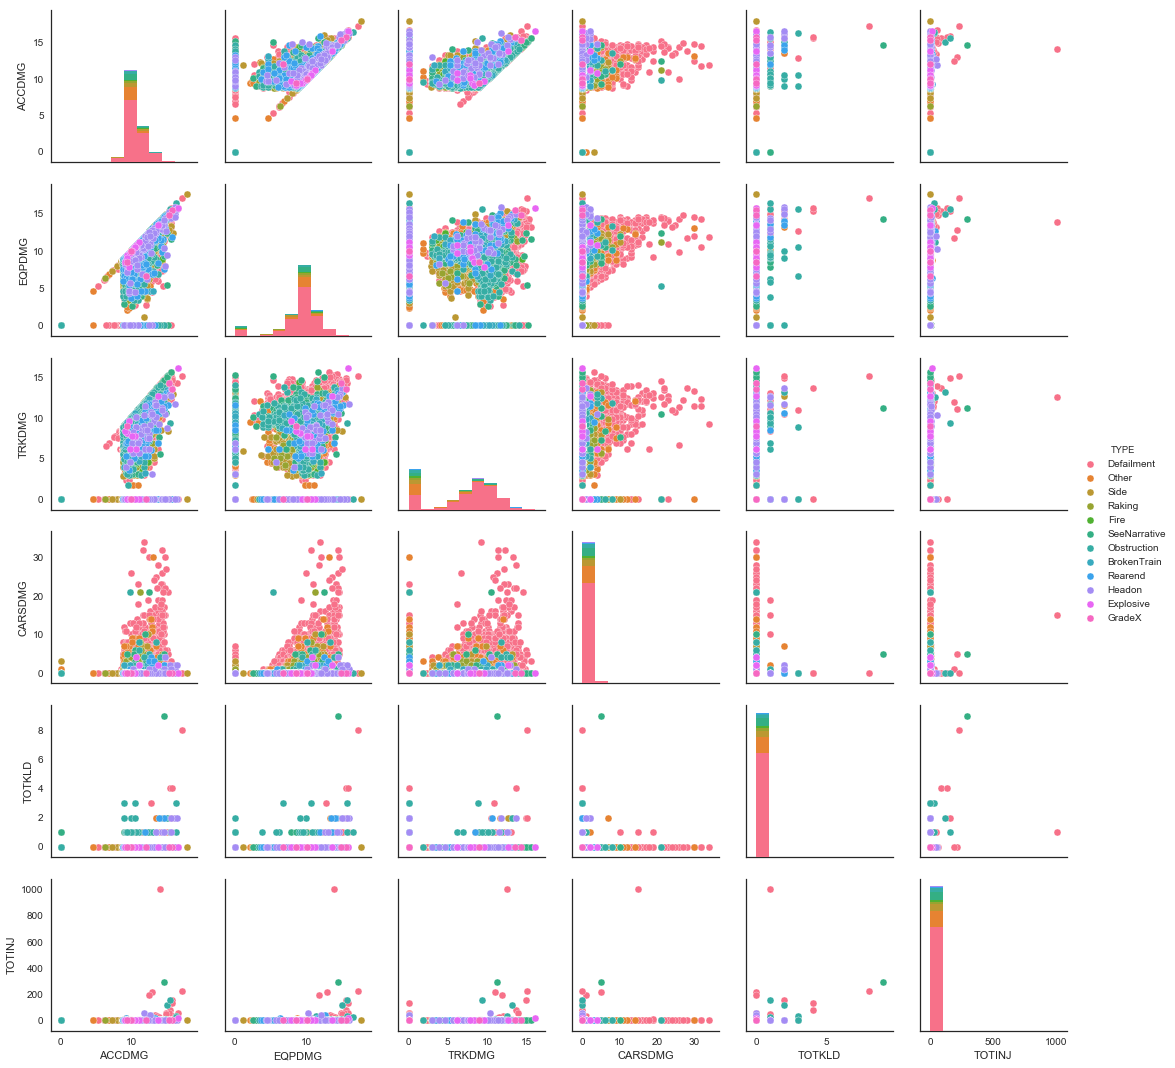

In [28]:
#log transformation for skewed predictors
response_log_df=np.log(accidents_df[["ACCDMG","EQPDMG","TRKDMG"]]+1)
response_log_df[["CARSDMG","TOTKLD","TOTINJ"]]=accidents_df[["CARSDMG","TOTKLD","TOTINJ"]]
response_log_df["TYPE"]=accidents_df.TYPE
sns.pairplot(response_log_df,vars=Response,hue="TYPE")

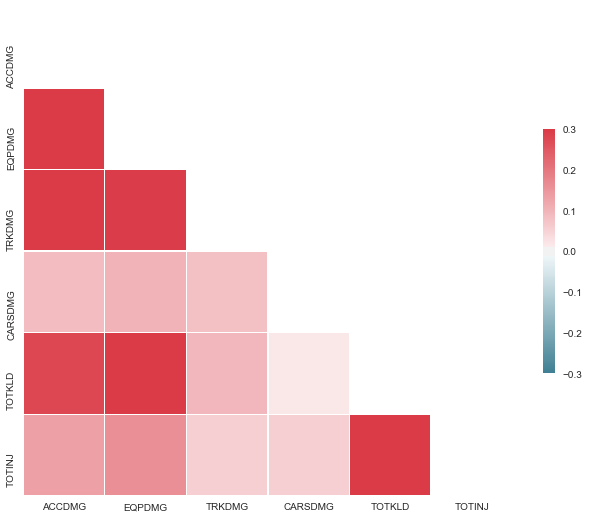

In [29]:
# Heat map to show correlations

sns.set(style="white")

# # Compute the correlation matrix
# for response variables
corr = accidents_df[Response].corr()

# # Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### In-Class Exercise 3

Look at histograms of  the predictor variable TEMP at different binwidths and comment on what you observe.

#### Answer
TEMP variable: specific temps with an increment of 5 and clear reporting bias toward multiple of 5. The prediction error is within (-5,5).

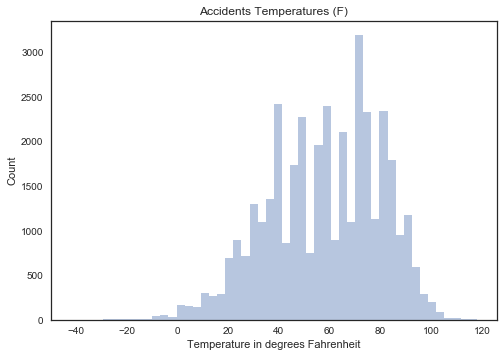

In [30]:
#Default bins
temp_hist = sns.distplot(accidents_df[['TEMP']],kde=False)
temp_hist.set_title("Accidents Temperatures (F)")
temp_hist.set_ylabel('Count')
temp_hist.set_xlabel("Temperature in degrees Fahrenheit")

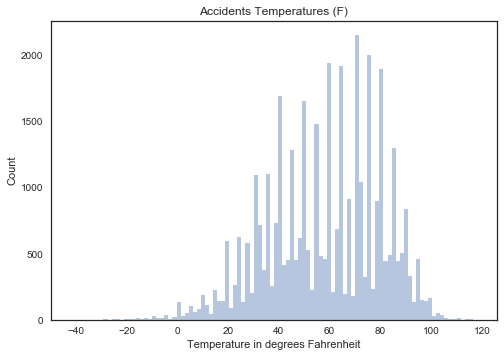

In [31]:
#100 bins histogram
temp_hist = sns.distplot(accidents_df[['TEMP']],bins=100,kde=False)
temp_hist.set_title("Accidents Temperatures (F)")
temp_hist.set_ylabel('Count')
temp_hist.set_xlabel("Temperature in degrees Fahrenheit")

### In-Class Exercise 4

Look at scatter plot matrices with a small set of predictor variables (e.g., TRNSPD, TONS, TEMP) and ACCDMG. Also look at heat maps.

#### Answer 
In scatter plot:
ACCDMG shows a clear outlier: the extreme accident(blue dot). 
ACCDMG and TEMP have a non-linear relationship. ACCDMG and MONTH do not seem to have an obvious relationship.  

In heatmap:
TRNSPD and TEMP are not shown in heatmap since it is non-linear relationship. 
TOTINJ and TOTINJ are correlated. 

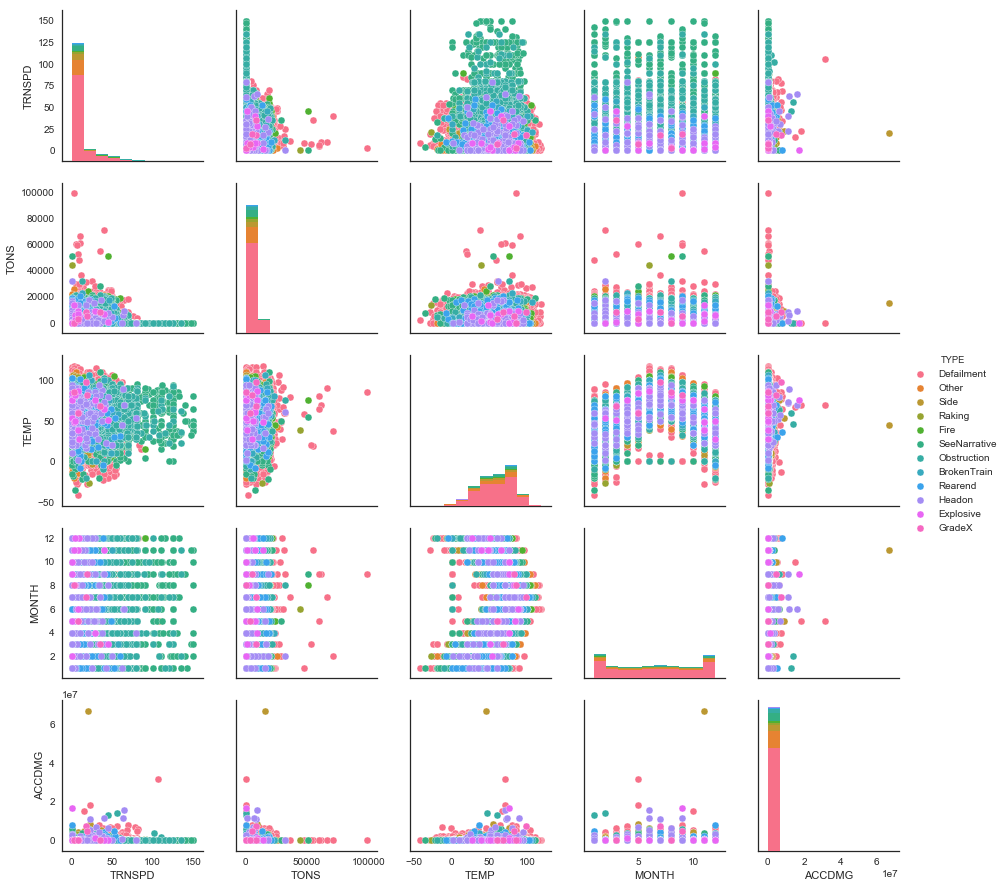

In [32]:
PredPlusACCDMG = Predictors
PredPlusACCDMG.append("ACCDMG")
sns.pairplot(accidents_df,vars=PredPlusACCDMG,hue="TYPE")

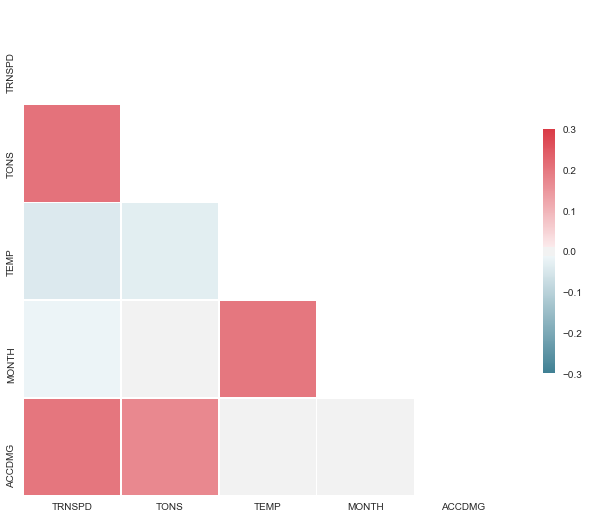

In [33]:
# Heat map to show correlations
sns.set(style="white")

# Compute the correlation matrix for response variables
corr = accidents_df[PredPlusACCDMG].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### In-Class Exercise 5 

Look at scatter plots between ACCDMG and TRNSPD condition on TYPE. Look at the plots with the log transform of ACCDMG. What do these plot imply?

#### Answer to Ex. 5
Multiple line intersecting, instead of paralleling: relationship of TRNSPD & ACCDMG depends on TYPE. Interaction between different types, not a strong interaction. The log transformation makes the interaction more obvious. Look at the code and plots below.

In [35]:
#Making type into a categorial variable for plotting object not equal to category
accidents_df['TYPE'] = accidents_df['TYPE'].astype('category')
accidents_df.TYPE.values.categories

Index(['BrokenTrain', 'Defailment', 'Explosive', 'Fire', 'GradeX', 'Headon',
       'Obstruction', 'Other', 'Raking', 'Rearend', 'SeeNarrative', 'Side'],
      dtype='object')

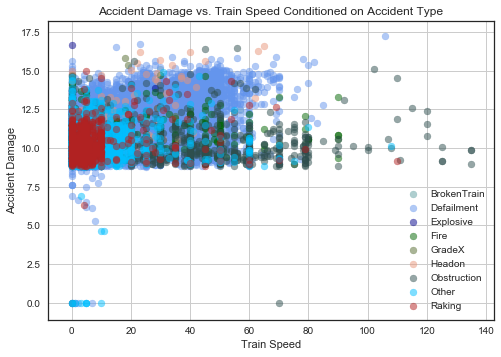

In [36]:
#Scatter plot of TRNSPD and ACCDMG
#Interaction plot with categorical variable
#TYPE
#Colorn
from matplotlib import colors as mcolors

color_choices =[num for num in np.arange(10,46) if (num&3 ==1)]
colors = list(list(mcolors.CSS4_COLORS.keys())[i] for i in color_choices)

#Categorical variable

target_names=accidents_df.TYPE.values.categories
y=accidents_df.TYPE

fig,ax = plt.subplots()
for i, color in zip(target_names,colors):
    ax.scatter(accidents_df.loc[y==i,'TRNSPD'],np.log(accidents_df.loc[y==i,'ACCDMG']+1),
                                                alpha=.5,c=color,label=i)

ax.legend(loc=4)
ax.grid(True)
plt.xlabel("Train Speed")
plt.ylabel("Accident Damage")
plt.title('Accident Damage vs. Train Speed Conditioned on Accident Type')

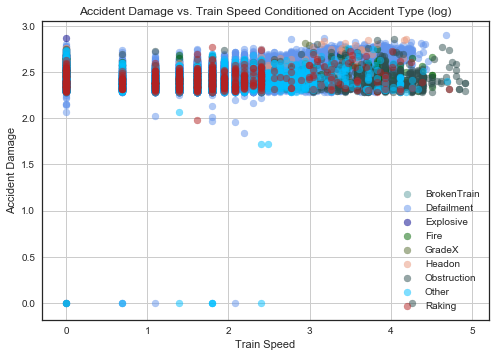

In [37]:
#Scatter plot of TRNSPD and ACCDMG
#Interaction plot with categorical variable
#Log transformation
response_log_df=np.log(accidents_df[["ACCDMG","EQPDMG","TRKDMG","TRNSPD"]]+1)
response_log_df[["CARSDMG","TOTKLD","TOTINJ"]]=accidents_df[["CARSDMG","TOTKLD","TOTINJ"]]
response_log_df["TYPE"]=accidents_df.TYPE

from matplotlib import colors as mcolors

color_choices =[num for num in np.arange(10,46) if (num&3 ==1)]
colors = list(list(mcolors.CSS4_COLORS.keys())[i] for i in color_choices)

#Categorical variable

target_names=response_log_df.TYPE.values.categories
y=response_log_df.TYPE

fig,ax = plt.subplots()
for i, color in zip(target_names,colors):
    ax.scatter(response_log_df.loc[y==i,'TRNSPD'],np.log(response_log_df.loc[y==i,'ACCDMG']+1),
                                                alpha=.5,c=color,label=i)

ax.legend(loc=4)
ax.grid(True)
plt.xlabel("Train Speed")
plt.ylabel("Accident Damage")
plt.title('Accident Damage vs. Train Speed Conditioned on Accident Type (log)')

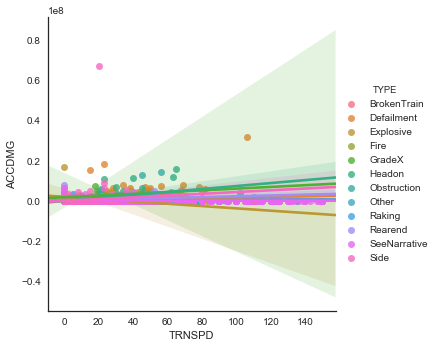

In [38]:
#Most useful
#simple regression fit according to type
sns.lmplot("TRNSPD","ACCDMG", data=accidents_df, hue="TYPE")

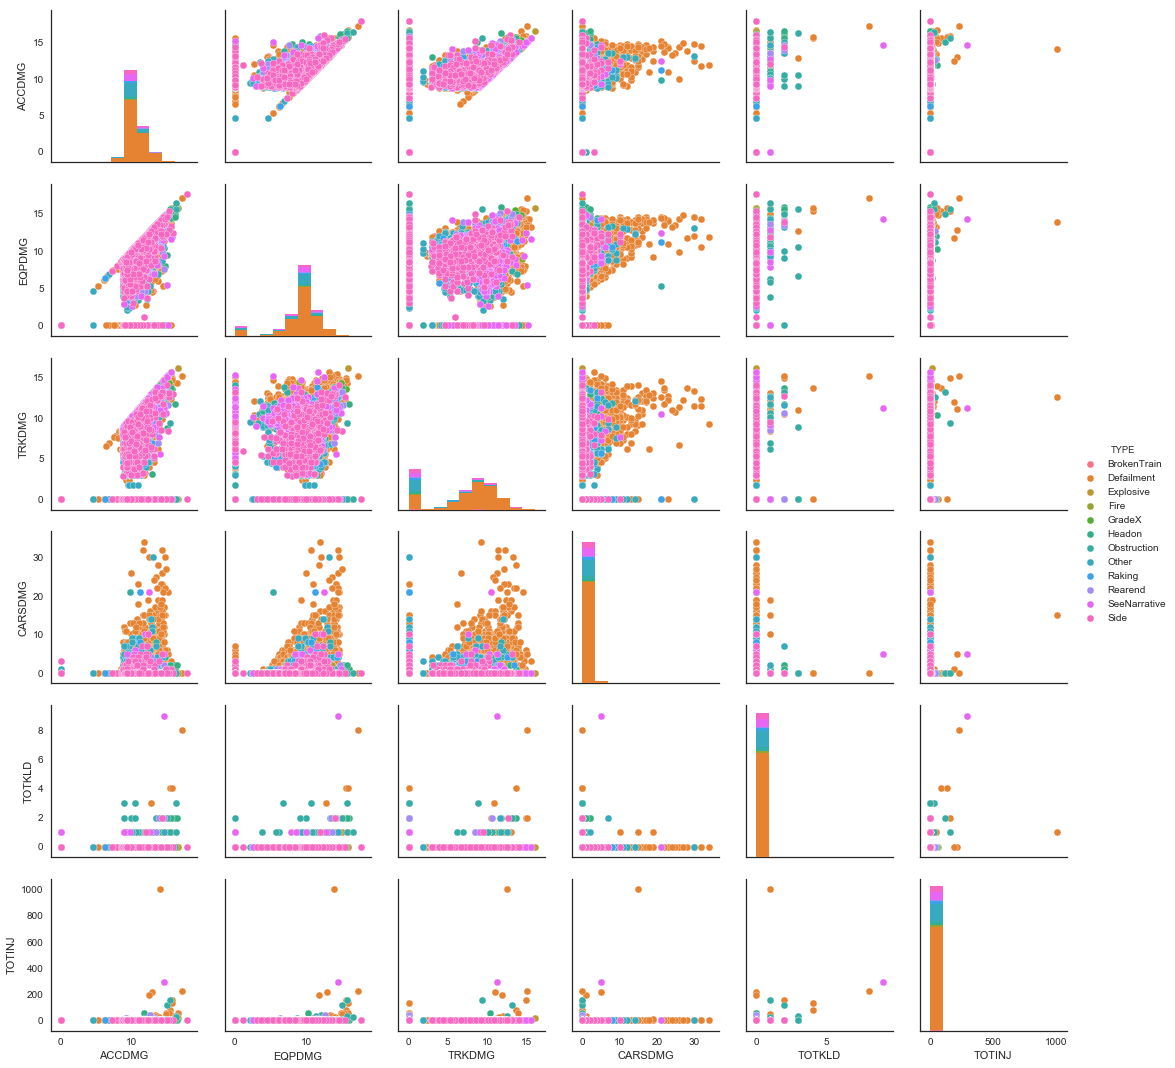

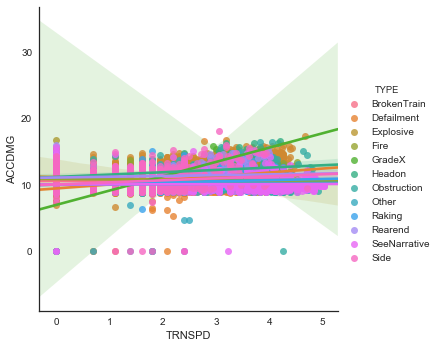

In [39]:
#log transform
#interaction is more obvious
#use log transform or we may drop out 0-impact var
sns.pairplot(response_log_df,vars=Response,hue="TYPE")

sns.lmplot("TRNSPD","ACCDMG", data=response_log_df, hue="TYPE")

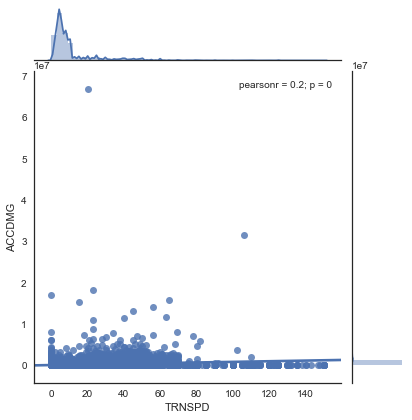

In [40]:
#joint plot
sns.jointplot("TRNSPD","ACCDMG", data=accidents_df, kind="reg")